/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


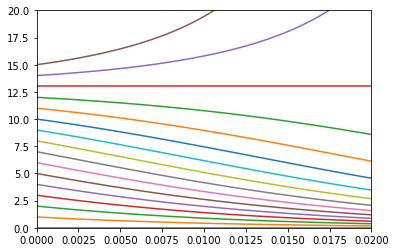

In [3]:
#http://blue.math.buffalo.edu/306/python_utilities_and_demos.html

from numpy import *
from pylab import plot,show,xlim,ylim,savefig
def x(t,x0): return 13./(1-(1-13./x0)*exp(91*t))
t = linspace(0,0.02,100)
for x0 in linspace(0,15,16):
        plot( t, x(t,x0) )
xlim(0,.02)
ylim(0,20)
# savefig('mysolutions.png')
show()

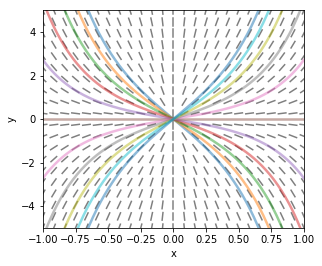

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def slopefield( slope, xmin,xmax,ymin,ymax, nx=21, woverh=1.2 ):

	#woverh = 1.2 #1. #.71 # height to width ratio of picture (a matter of taste)
	gap = 0.3    # relative gap between grid circles
  
	width = 10. # (nominal - doesn't currently have any effect)
	height = width/woverh 
	
	rx = xmax - xmin
	ry = ymax - ymin

	xfac = width /rx
	yfac = height/ry

	dpx = width /float(nx-1)   # horizontal distance between gridpoints in picture
	ny = int( np.floor(height/dpx) )
	dpy = height/float(ny-1)   # vertical   distance between gridpoints in picture (as close as possible to horizontal)

	xsemi = 0.5*dpx/xfac*(1.-gap)  # horizontal semi-axis of ellipses in x coordinates
	ysemi = 0.5*dpx/yfac*(1.-gap)  # vertical   semi-axis of ellipses in y coordinates
	
	x = np.linspace(xmin,xmax,nx)
	y = np.linspace(ymin,ymax,ny)
	X,Y = np.meshgrid(x,y)

	with np.errstate(divide='ignore',invalid='ignore'):	
		S = slope(X,Y)
	A = np.arctan( S*(xsemi/ysemi) )  
	Xplus  = ( X + xsemi*np.cos(A) ).reshape(nx*ny)
	Xminus = ( X - xsemi*np.cos(A) ).reshape(nx*ny)
	Yplus  = ( Y + ysemi*np.sin(A) ).reshape(nx*ny)
	Yminus = ( Y - ysemi*np.sin(A) ).reshape(nx*ny)
	
	plt.subplot(111, aspect = rx/woverh/float(ry) ) 

	plt.plot( np.array(list(zip(Xminus,Xplus))).T, np.array(list(zip(Yminus,Yplus))).T, color='k', alpha=0.5 )
	plt.xlim(xmin,xmax)
	plt.ylim(ymin,ymax)

if __name__ == "__main__":
	# direction field

	plt.figure(facecolor='w')

	def f(x,y): return (2*x**2*y + y)/x
	slopefield( f, -1,1, -5,5, 25 )

	# solution curves
	x = linspace(-1,1,200)
	for k in range(-5,6): 
		plt.plot( x, k*x*exp(x**2), linewidth=2.5, alpha=0.5 )

	plt.xlabel('x')
	plt.ylabel('y')
	plt.show()